# Video games sales - getting to know the data

### Imports and loading the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Checking for amount of values, % of NaN data and values ranges

In [71]:
counts = df.nunique()
counts.name = 'Unique Values'
nans = df.isnull().mean()
nans.name = 'NaN Percentage'
ranges = df.select_dtypes(include='number').agg(lambda x: f"{x.min():.0f}-{x.max():.0f}")
ranges.name = 'Range'

# Merge the counts, NaN percentages, and ranges into a single DataFrame
desc = pd.merge(counts, nans, left_index=True, right_index=True)
desc = pd.merge(desc, ranges, left_index=True, right_index=True,how='left')
desc

,Unique Values,NaN Percentage,Range
Rank,16598,0.000000,1-16600
Name,11493,0.000000,NaN
Platform,31,0.000000,NaN
Year,39,0.016327,1980-2020
Genre,12,0.000000,NaN
Publisher,578,0.003494,NaN
NA_Sales,409,0.000000,0-41
EU_Sales,305,0.000000,0-29
JP_Sales,244,0.000000,0-10
Other_Sales,157,0.000000,0-11


## Function to plot sales by sales geography and selected data column

In [5]:
def plot_sales_dist(df,col, sales_col,top_x = False):
    """ plot a normalized histogram of a column by sales column"""
    sales_sums = df[[col, sales_col]].groupby(col)[sales_col].sum()
    normalized = sales_sums/sum(df[sales_col])*100
    
    sorted_values = normalized.sort_values(ascending=False)
    if top_x:
        sorted_values = sorted_values[:top_x]
    plt.bar(sorted_values.index, sorted_values.values)
    plt.title(f'{sales_col} distribution by column {col} (%)')
    plt.xticks(rotation='vertical')
    plt.show()

### Plotting Japan sales over release year as an example

We see that in Japan, game/s produced in 2006 sell more than games produced in all other years (6% of the sales) 

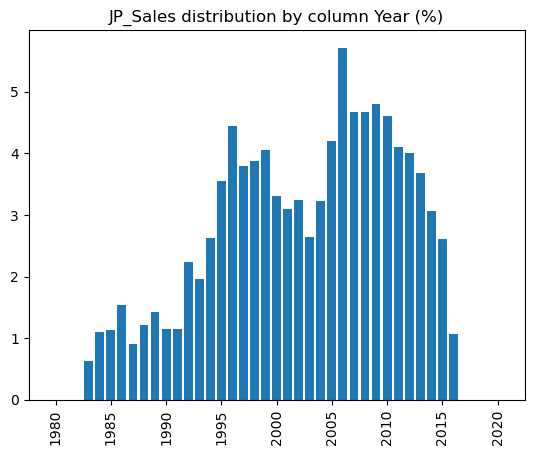

In [6]:
col = 'Year'
sales_col = 'JP_Sales'
plot_sales_dist(df,col,sales_col)

## Plotting top 10 publishers by global sales

We see that 20% of all global sales are for games made by **Nintendo**

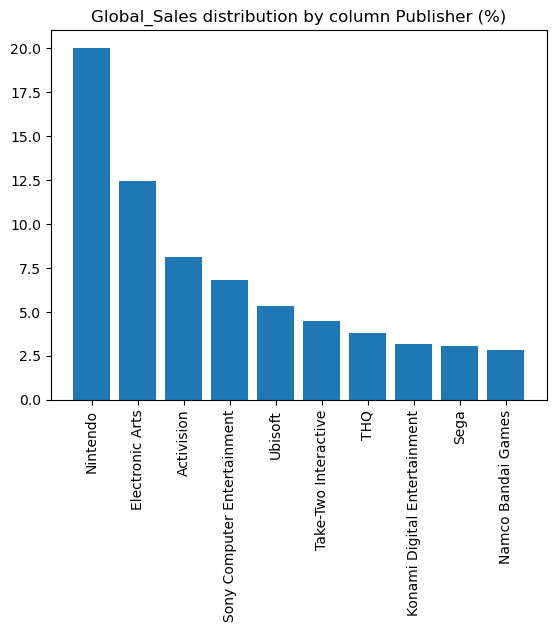

In [10]:
plot_sales_dist(df,'Publisher','Global_Sales',10)

## Sales correlation

How do sales in different geographies correlate to one another?

We see that **global sales** are best correlated to **north america** sales (0.94), and least correlated to **Japan** sales (0.61)

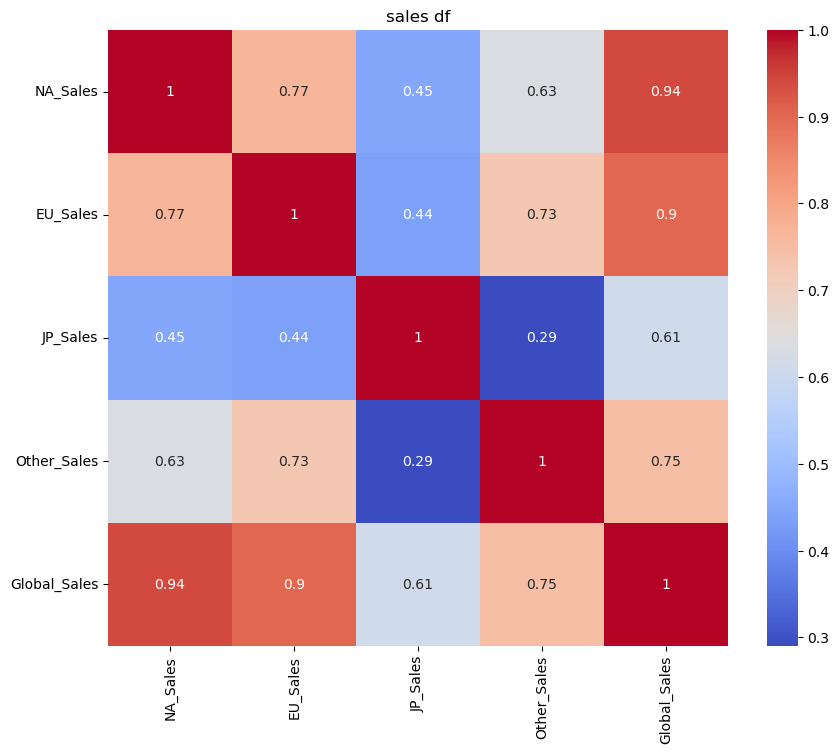

In [12]:
def plot_correlation(df, title):
    """ plot correlation of columns in a dataframe """
    corr_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(title)
    plt.xticks(rotation='vertical')
    plt.yticks(rotation='horizontal')
    plt.show()

sales_df = df[[x for x in list(df) if 'Sales' in x]]
plot_correlation(sales_df,'sales df')

### Top values per textual columns

To complete our tour of the data, we will peek at top most frequent values for each of the textual columns. Frequency here denotes the num of games that made it into this dataset due to their sales.

Note that frequency does not correlate with sales amount. For instance the best selling publisher, Nintendo, is not in the top 5 frequent publishers list. Depending on the business questions we decide to address, we may want to look into that later on.

In [27]:
for col in ['Platform','Genre','Publisher']:
    series = df[col]
    uniques = len(series.unique())
    print('=============================')
    print(f"Column: {col} (#values: {uniques})")
    print('=============================')
    counts = series.value_counts()/len(df)*100
    top_counts = counts[:min(5,len(counts))]
    [print(f"{i} - {top_counts[i]:.2f}%") for i in top_counts.index]
    

Column: Platform (#values: 31)
DS - 13.03%
PS2 - 13.02%
PS3 - 8.01%
Wii - 7.98%
X360 - 7.62%
Column: Genre (#values: 12)
Action - 19.98%
Sports - 14.13%
Misc - 10.48%
Role-Playing - 8.96%
Shooter - 7.89%
Column: Publisher (#values: 579)
Electronic Arts - 8.14%
Activision - 5.87%
Namco Bandai Games - 5.62%
Ubisoft - 5.55%
Konami Digital Entertainment - 5.01%
